In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df_index = pd.read_csv('economic_index.csv')
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
df_index.drop(columns=["Unnamed: 0", "year", "month"], axis=1, inplace=True)
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [4]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

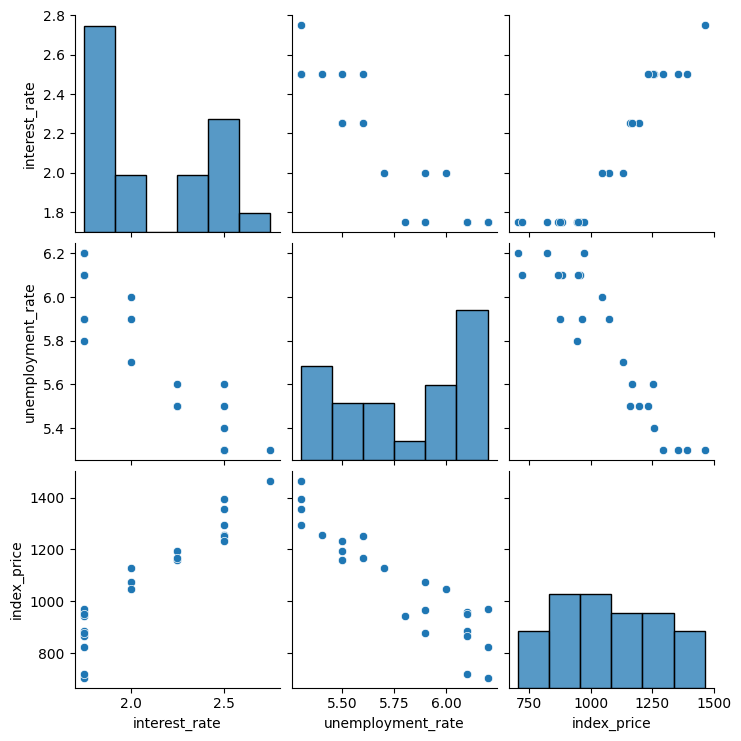

In [5]:
import seaborn as sns
sns.pairplot(df_index)

In [15]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment rate')

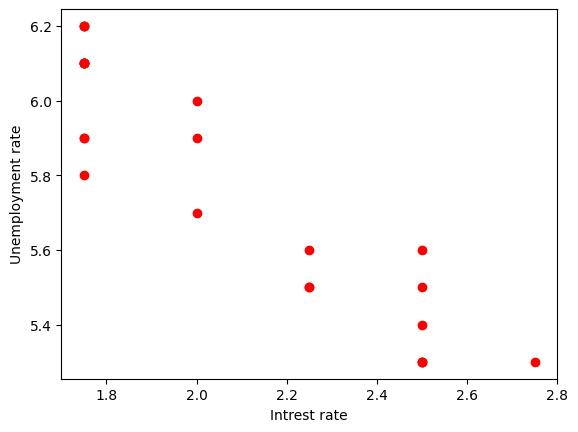

In [6]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Intrest rate")
plt.ylabel("Unemployment rate")

In [7]:
# Independent And Dependent Features
# We can get multiple independent features in multiple ways
# ----------------One----------------------
# X = df_index[['intrest_rate', 'unemployment_rate']]

# ----------------two----------------------
X = df_index.iloc[:, :-1]
y = df_index.iloc[:,  -1]


In [21]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [23]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

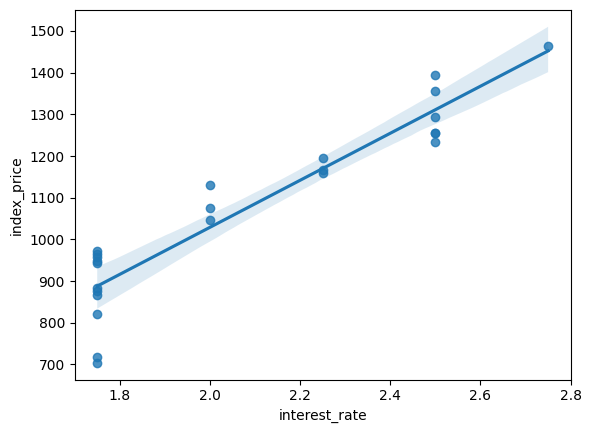

In [9]:
import seaborn as sns
sns.regplot(x='interest_rate', y='index_price', data=df_index)


<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

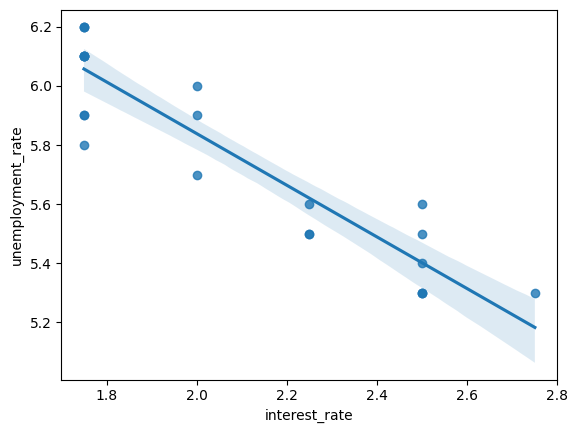

In [39]:
sns.regplot(x='interest_rate', y='unemployment_rate', data=df_index)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler();
X_train_data = scaler.fit_transform(X_train)
X_test_data  = scaler.fit_transform(X_test)
X_train_data

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [70]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train_data, y_train)

LinearRegression()

In [71]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train_data, y_train, scoring="neg_mean_squared_error", cv = 3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [72]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [74]:
y_pred = regression.predict(X_test_data)

In [76]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [80]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [82]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
predict = model.predict(X_test)

In [84]:
print(predict)
print(model.summary())

8     1169.232446
16     869.856341
0     1458.321844
18     871.913683
11    1018.515723
9     1167.175105
dtype: float64
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              1468.
Date:                Sun, 11 May 2025   Prob (F-statistic):                    7.46e-19
Time:                        11:20:09   Log-Likelihood:                         -104.21
No. Observations:                  18   AIC:                                      212.4
Df Residuals:                      16   BIC:                                      214.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                

d:\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


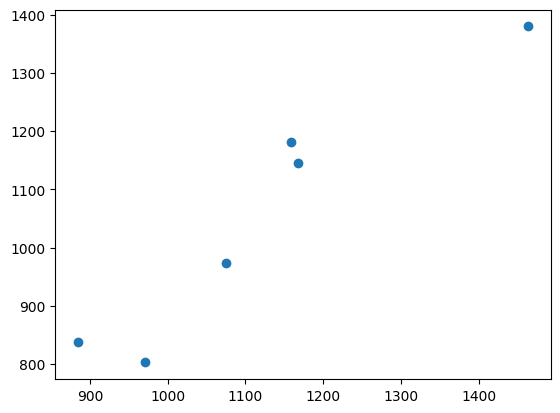

In [88]:

plt.scatter(y_test, y_pred)

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64


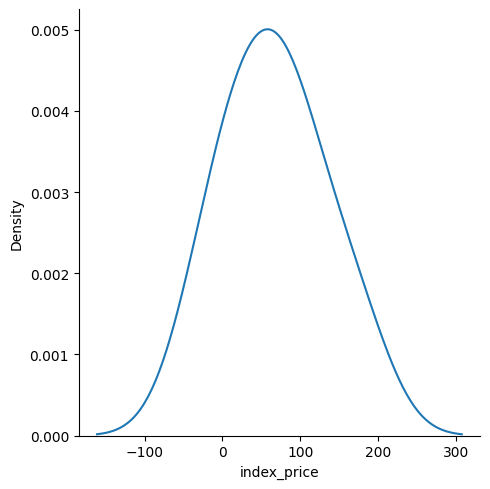

In [92]:
residuals = y_test - y_pred
print(residuals)
sns.displot(residuals, kind='kde')

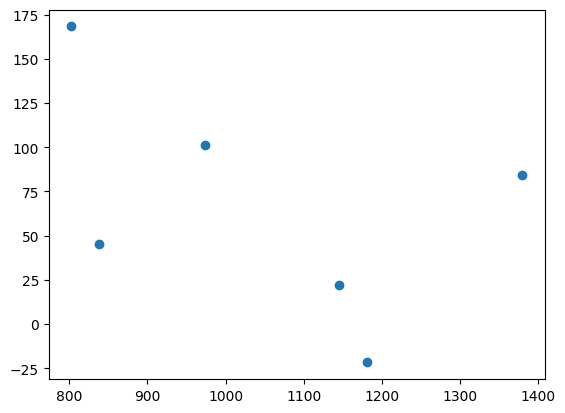

In [94]:
plt.scatter(y_pred, residuals)

In [98]:
import statsmodels.api as sm
model = sm.OLS(y_train, X_train_data).fit()
model.summary()

d:\Machine Learning\venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 11 May 2025   Prob (F-statistic):                       0.754
Time:                        11:29:12   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [97]:
regression.coef_

array([  88.27275507, -116.25716066])